In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Download global temperature anomaly from 1850 to the present. Temperatures should be monthly.
2. Import the temperature data into a python notebook.

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/ColabNotebooks/ITP359/HW7/data.csv'

temperature_data = pd.read_csv(file_path, skiprows=4)
print(temperature_data.head())

     Date  Anomaly
0  185001    -1.26
1  185002    -0.54
2  185003    -0.46
3  185004    -0.96
4  185005    -0.81


3. Convert the Year column into datetime (from pandas)

In [ ]:
temperature_data['Date'] = pd.to_datetime(temperature_data['Date'], format='%Y%m')

print(temperature_data.head())

        Date  Anomaly
0 1850-01-01    -1.26
1 1850-02-01    -0.54
2 1850-03-01    -0.46
3 1850-04-01    -0.96
4 1850-05-01    -0.81


4. Plot the temperature anomaly vs year.

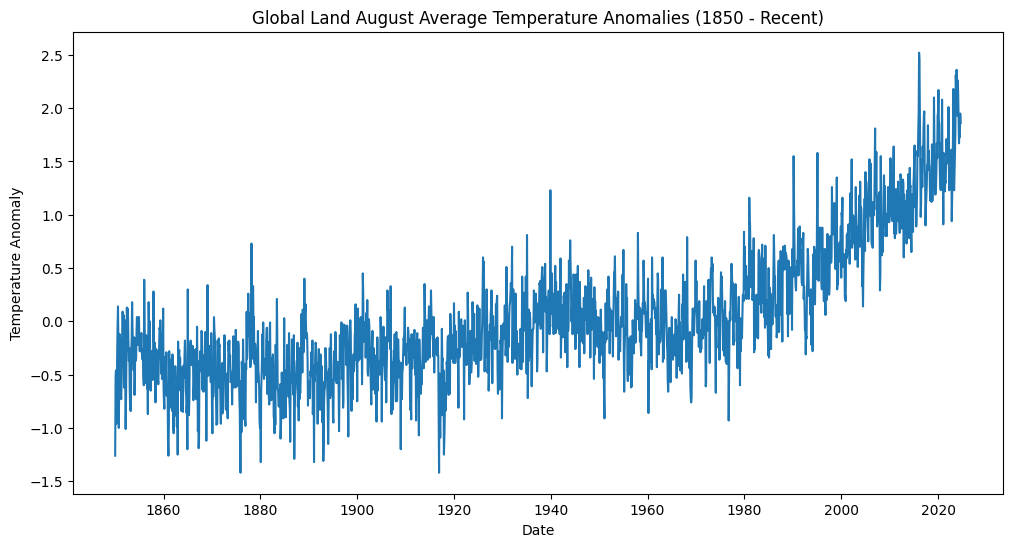

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(temperature_data['Date'], temperature_data['Anomaly'])
plt.title('Global Land August Average Temperature Anomalies (1850 - Recent)')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.show()

5. Save only the temperature anomaly into a 2D numpy array.

In [ ]:
temperature_anomalies = temperature_data['Anomaly'].values.reshape(-1, 1)

print(temperature_anomalies[:5])

[[-1.26]
 [-0.54]
 [-0.46]
 [-0.96]
 [-0.81]]


6. Scale the temperature using minmaxscaler.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

temperature_anomalies_scaled = scaler.fit_transform(temperature_anomalies)

print(temperature_anomalies_scaled[:5])

[[0.04060914]
 [0.22335025]
 [0.24365482]
 [0.11675127]
 [0.15482234]]


7. Convert the temperature array into sequences of n monthly temperatures that are shifted by one month in each row of the array. Call this array X. y is the next month’s temperature (1D array). The length of the sequence n is your choice (e.g. 24).


In [ ]:
import numpy as np
def create_sequences(data, n_sequence):
    X, y = [], []
    for i in range(len(data) - n_sequence):
        X.append(data[i:(i + n_sequence)])
        y.append(data[i + n_sequence])
    return np.array(X), np.array(y)

n_sequence = 24
X, y = create_sequences(temperature_anomalies_scaled, n_sequence)

# X shape and y shaepe
print("X shape:", X.shape)
print("y shape:", y.shape)

#Check first 5
print("X:\n", X[:1])
print("y:\n", y[:1])



X shape: (2073, 24, 1)
y shape: (2073, 1)
X:
 [[[0.04060914]
  [0.22335025]
  [0.24365482]
  [0.11675127]
  [0.15482234]
  [0.28172589]
  [0.34771574]
  [0.39593909]
  [0.3071066 ]
  [0.10659898]
  [0.20304569]
  [0.32994924]
  [0.22335025]
  [0.31979695]
  [0.19035533]
  [0.1751269 ]
  [0.21827411]
  [0.28426396]
  [0.38324873]
  [0.38324873]
  [0.3248731 ]
  [0.37563452]
  [0.20304569]
  [0.27664975]]]
y:
 [[0.36294416]]


8. Build a dense feedforward neural network with sequences of temperature as input and y as the output.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

input_shape = X.shape[1]

# construct model
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # only 1 for output for the temperature
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9. Use mean squared error as the loss function.


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,081 (55.00 KB)

 Trainable params: 14,081 (55.00 KB)

 Non-trainable params: 0 (0.00 B)

10. Train the network.


In [ ]:
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0382 - val_loss: 0.0123
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0062 - val_loss: 0.0078
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0051 - val_loss: 0.0080
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0060
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052 - val_loss: 0.0104
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0108
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0051 - val_loss: 0.0063
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0048 - val_loss: 0.0054
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0060
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0047 - val_loss: 0.0058
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0046 - val_loss: 0.0065
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0045 - val_l

11. Predict the next month’s temperature for all sequences in X. Inverse scale the temperature.


In [ ]:
predictions_scaled = model.predict(X)

predictions = scaler.inverse_transform(predictions_scaled)

print("the next month’s temperature for all sequences in X:\n", predictions)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
the next month’s temperature for all sequences in X:
 [[-0.33739275]
 [-0.18560615]
 [-0.5176168 ]
 ...
 [ 1.6220593 ]
 [ 1.6545955 ]
 [ 1.6267176 ]]


12. Score the model.

In [ ]:
from sklearn.metrics import r2_score
#R² Score to score the model

r2 = r2_score(y, predictions)
print("R² Score:", r2)

R² Score: -8.976569477576657


13. Now plot the predicted temperatures and the actual temperatures.


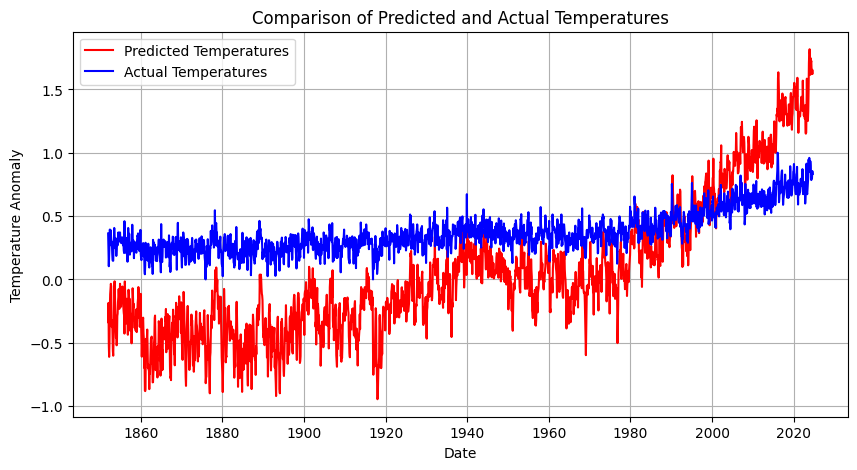

In [ ]:
date_range = temperature_data['Date'][-len(y):]

plt.figure(figsize=(10, 5))
plt.plot(date_range, predictions, label='Predicted Temperatures', color='red')
plt.plot(date_range, y, label='Actual Temperatures', color='blue')
plt.title('Comparison of Predicted and Actual Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.grid(True)
plt.show()

14. Now predict the temperature for the next 24 months into the future (after the end of the available temperature data).

  a. For every month in the future, you will predict the temperature.
  
  b. Each month’s predicted temperature should be stored back into the sequence for predicting the following month. So, each y value becomes part of X. (7 points)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


<ipython-input-106-9b1f18a6b0bc>:28: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_date_range = pd.date_range(start=last_date, periods=25, freq='M')[1:]


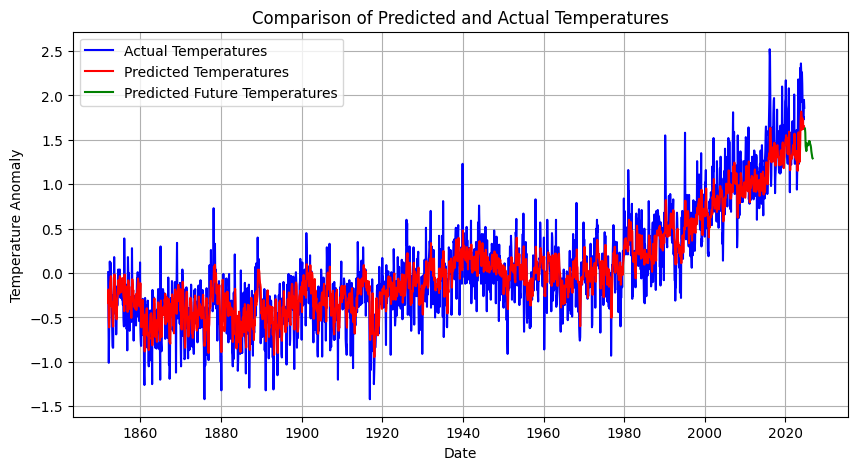

In [ ]:
actual_temperatures = scaler.inverse_transform(y.reshape(-1, 1)).flatten() #actual data

predictions_scaled = model.predict(X)
predicted_temperatures = scaler.inverse_transform(predictions_scaled).flatten() #predicted for the actual data's month

last_sequence = X[-1:]
future_temperatures = []

for _ in range(24):
    # next month's prediction
    next_prediction_scaled = model.predict(last_sequence)

    # inverse by scaler
    next_temperature = scaler.inverse_transform(next_prediction_scaled).flatten()[0]

    # add prediction to future_temperatures
    future_temperatures.append(next_temperature)

    next_prediction_scaled = np.expand_dims(next_prediction_scaled, axis=-1)

    # add prediction to last sequence's tail
    last_sequence = np.concatenate([last_sequence[:, 1:], next_prediction_scaled], axis=1)

date_range_actual = temperature_data['Date'][-len(actual_temperatures):]

# calculate the date of future
last_date = date_range_actual.iloc[-1]
future_date_range = pd.date_range(start=last_date, periods=25, freq='M')[1:]

plt.figure(figsize=(10, 5))
plt.plot(date_range_actual, actual_temperatures, label='Actual Temperatures', color='blue')
plt.plot(date_range_actual, predicted_temperatures, label='Predicted Temperatures', color='red')
plt.plot(future_date_range, future_temperatures, label='Predicted Future Temperatures', color='green')

plt.title('Comparison of Predicted and Actual Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.grid(True)
plt.show()